In [1]:
%matplotlib notebook
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [27]:
A = pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:C",nrows=8,skiprows=1,sheet_name='DatosParaPlot')   
data = A.to_numpy()
B = pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:C",nrows=8,skiprows=11,sheet_name='DatosParaPlot')   
dataB = B.to_numpy()
C= pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="A:C",nrows=7,skiprows=21,sheet_name='DatosParaPlot') 
dataC = C.to_numpy()

In [28]:
f_adim,delta_adim,CD = data.T
f_adim2,delta_adim2,CD2=dataB.T
f_adim3,delta_adim3,CD3=dataC.T

<IPython.core.display.Javascript object>


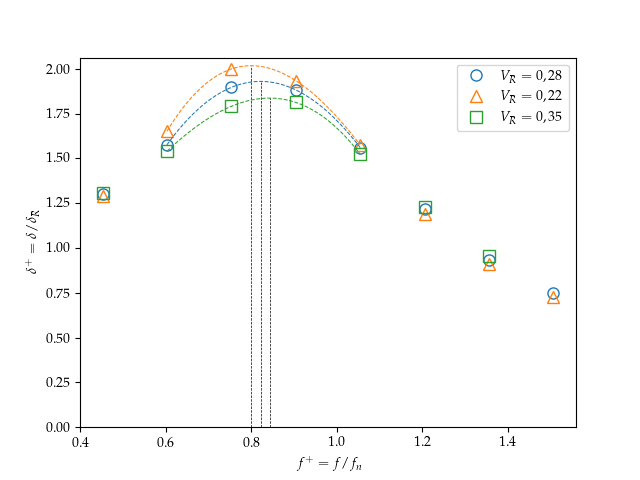

In [38]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
#Gráfico de los puntos de datos
ax.plot(f_adim,delta_adim,'o',color='tab:blue',markersize=8,label='$V_R=0,28$',fillstyle='none')
ax.plot(f_adim2,delta_adim2,'^',color='tab:orange',markersize=8,label='$V_R=0,22$',fillstyle='none')
ax.plot(f_adim3,delta_adim3,'s',color='tab:green',markersize=8,label='$V_R=0,35$',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$')
ax.set_ylabel(r'$\delta^+=\delta /\delta_R$')
ax.set_ylim(bottom=0)
ax.grid(False)
ax.legend()
#Polyfit y plot de VR=0,28
z=np.polyfit(f_adim[1:5], delta_adim[1:5], 3)
f=np.poly1d(z)
f_c = np.linspace(f_adim[1],f_adim[4],100)
d_c = f(f_c)
index_max = d_c.argmax()
ax.plot(f_c,d_c,linestyle='dashed',color='tab:blue',linewidth=0.75)
#Máximo de VR=0,28
index_max = d_c.argmax()
#ax.plot([f_adim.min(),f_c[index_max]],[d_c[index_max],d_c[index_max]],linestyle='--',linewidth=0.5,color='black')
ax.plot([f_c[index_max],f_c[index_max]],[0,d_c[index_max]],linestyle='--',linewidth=0.5,color='black')
#Polyfit y plot de VR=0,22
z2=np.polyfit(f_adim2[1:5], delta_adim2[1:5], 3)
f2=np.poly1d(z2)
f_c2 = np.linspace(f_adim2[1],f_adim2[4],100)
d_c2 = f2(f_c2)
index_max2 = d_c2.argmax()
ax.plot(f_c2,d_c2,linestyle='dashed',color='tab:orange',linewidth=0.75)
#Máximo de VR=0,22
#ax.plot([f_adim2.min(),f_c2[index_max2]],[d_c2[index_max2],d_c2[index_max2]],linestyle='--',linewidth=0.5,color='black')
ax.plot([f_c2[index_max2],f_c2[index_max2]],[0,d_c2[index_max2]],linestyle='--',linewidth=0.5,color='black')
#Polyfit y plot de VR=0,35
z3=np.polyfit(f_adim3[1:5], delta_adim3[1:5], 3)
f3=np.poly1d(z3)
f_c3 = np.linspace(f_adim3[1],f_adim3[4],100)
d_c3 = f3(f_c3)
index_max3 = d_c3.argmax()
ax.plot(f_c3,d_c3,linestyle='dashed',color='tab:green',linewidth=0.75)
#Máximo de VR=0,22
ax.plot([f_c3[index_max3],f_c3[index_max3]],[0,d_c3[index_max3]],linestyle='--',linewidth=0.5,color='black')
plt.savefig('DesplazamientoVsFrecuencia.pdf') 
plt.savefig('DesplazamientoVsFrecuencia.png') 

<IPython.core.display.Javascript object>


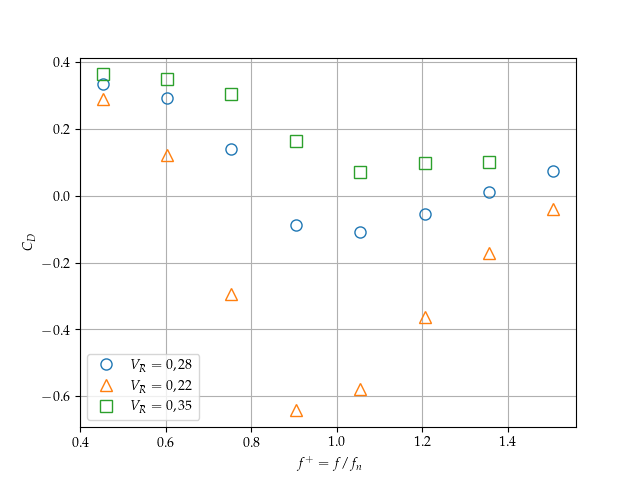

In [39]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(f_adim,CD,'o',color='tab:blue',markersize=8,label='$V_R=0,28$',fillstyle='none')
ax.plot(f_adim,CD2,'^',color='tab:orange',markersize=8,label='$V_R=0,22$',fillstyle='none')
ax.plot(f_adim3,CD3,'s',color='tab:green',markersize=8,label='$V_R=0,35$',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$')
ax.set_ylabel('$C_D$')
ax.grid()
ax.legend(loc='lower left')
plt.savefig('CDVsFrecuencia.pdf') 
plt.savefig('CDVsFrecuencia.png') 